# <font color='blue'> Week - 3: Let's get rich </font>
*Provided by:*
![ENSTABrain](images/LogoEB.png)

# <font color='blue'>Agenda</font>


- Let's import our Dataset and visualize it
- Clean our data
- Linear Regression
- preprocessing
- Cross Validation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv('data/google.csv')

data.head()


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
data.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

In [4]:
# As we can see the type of elements in the Date column isn't recognized. To better use dates in our set we need to change
#its type to datetime
data['Date'] = data['Date'].astype('datetime64[ns]')
data.set_index('Date',inplace=True)#We will make the column Date our index in the table

In [5]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
data.shape

(3125, 12)

**Let's understand our Data: **

Open: The price at the beginning of the trading day

High: The highest price the stock reached during the day

Low: The lowest price reached during the day

Close: The final price

Volume: Number of stocks traded on one day (A stock with low volume is thinly traded, which means it lacks liquidity= Very hard to trade! A stock with higher-than-average trading means that the stock is very liquid but its price can change very quickly)

Adj: 
The adjusted closing price uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings. The adjusted closing price represents a more accurate reflection of a stock's value

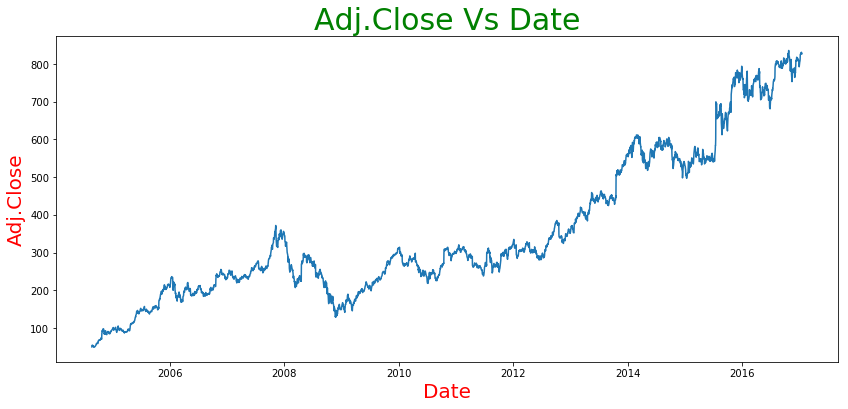

In [7]:
plt.figure(figsize=(14,6))
plt.plot(data['Adj. Close'])
plt.title("Adj.Close Vs Date",fontsize=30,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Adj.Close",fontsize=20,color='r')
plt.show()



We can notice that ,apart from the dip in 2008 caused by The Great Panic, the stock pretty much follows a linear line. 

**Let's make our new more representative features: ** 

In [8]:
#This is called feature engineering:
data['High_Low_Change']=(data['Adj. High']-data['Adj. Close'])/data['Adj. Close']*100.0
data['Change_Perc']=(data['Adj. Close']-data['Adj. Open'])/data['Adj. Open']*100.0

** Now, let's make our new dataframe: **

In [9]:
data=data[['Adj. Close','High_Low_Change','Change_Perc','Adj. Volume']]
data.fillna(data.mean(),inplace=True)

,Adj. Close,High_Low_Change,Change_Perc,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


**Regression Vs Classification**

Our goal is to predict the closing price of the stock. Where is the label that we need?

In classification problems, our labels are categories in which we need to classify our data. Our goal is to identify the group membership.(Examples: Week 1 and Week 2)

In regression problems, our lables are continuous values and we need to predict what values they will have in a different setting.

![ENSTABrain](images/ml.png)

**Let's make our label : ** 

We are going to make a prediction for a month in advance.That's why we need to create a new column which has the values of the new Adj.Close price after a month from the data we have in our dataset.

In [10]:
data['Price_After_Month']=data['Adj. Close'].shift(-30)

*Congatulations! You made your 1st labeling* 

In [11]:
data.tail()

,Adj. Close,High_Low_Change,Change_Perc,Adj. Volume,Price_After_Month
Date,,,,,
2017-01-10,826.01,0.411617,-0.128163,1141799.0,NaN
2017-01-11,829.86,0.004820,0.391958,1261666.0,NaN
2017-01-12,829.53,0.102468,0.138825,1348274.0,NaN
2017-01-13,830.94,0.446482,-0.007220,1255255.0,NaN
2017-01-17,827.20,0.360251,-0.337349,1242810.0,NaN


**Preprocessing! ** 

In [12]:
#We need to preprocess our data to scale it. When we use the function scale, we get a data that has a mean=0. 
#This is essential to not lose accuracy
from sklearn import preprocessing
X=np.array(data.drop(['Price_After_Month'],axis=1))#X is the matrix containing our features
X=preprocessing.scale(X)
#Since we will drop the 30 NaN values in y we need to drop 30 values in X so that X and y have the same shape
X=X[:-30] #We will take all the elements of X apart from the last 30 elements
X_pred=X[-30:]#We will take the last 30 elements of X to make our predicton on them
data.dropna(how='any',inplace=True)
y=np.array(data['Price_After_Month'])#y is our label

In [13]:
data.tail()
#We can see that the last date in our data is 2016-12-01! This will be important later on so keep in mind. 
#We will predict 30 days into the future. in In [20] you should get 2016-12-31 as the last date in your table

,Adj. Close,High_Low_Change,Change_Perc,Adj. Volume,Price_After_Month
Date,,,,,
2016-11-25,780.23,0.342207,-0.304111,613549.0,826.01
2016-11-28,785.79,1.775283,0.955868,2412945.0,829.86
2016-11-29,789.44,0.886704,0.134453,1527627.0,829.53
2016-11-30,775.76,2.030267,-1.690534,2243483.0,830.94
2016-12-01,764.33,1.866995,-1.826472,2851729.0,827.20


**splitting our data as usual+cross-validation: **

In [14]:
from sklearn import cross_validation
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Build it, Train it, Test it! **

![ENSTABrain](images/pic111.gif)

Coefficient of Determination used in the score function : $$ 1-\frac{\sum(y_{true}-y_{pred})^{2} }{\sum (y_{true}-y_{mean,true})^{2}} $$

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
fit=reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 96.858 %


In [16]:
from sklearn.ensemble import RandomForestRegressor
reg1=RandomForestRegressor()
reg1.fit(X_train,y_train)
accuracy=reg1.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much a line can fit our data

Accuracy is: 97.0704 %


In [17]:
preds = fit.predict(X_test)
print(preds[1], y_test[1])
#We can see that our predictions are kind of accurate but we still need to work on on them a lot. You can try different 
#methods to get a better prediction

191.120492557 209.551866537


In [18]:
from sklearn import metrics

print('MSE = ',metrics.mean_squared_error(y_test, preds))

MSE =  1147.04110211


In [19]:
#Apply our model and get our prediction
forecast=reg.predict(X_pred)

In [20]:
#creating a new column which contains the predictions! 
#Proceed at your own risk :p  
from datetime import datetime, timedelta
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data=data.append(df1)
data.tail()

,Adj. Close,Adj. Volume,Change_Perc,Forecast,High_Low_Change,Price_After_Month
2016-12-27,NaN,NaN,NaN,786.291017,NaN,NaN
2016-12-28,NaN,NaN,NaN,788.995703,NaN,NaN
2016-12-29,NaN,NaN,NaN,794.263048,NaN,NaN
2016-12-30,NaN,NaN,NaN,780.598850,NaN,NaN
2016-12-31,NaN,NaN,NaN,769.298493,NaN,NaN


In [21]:
data.head()

,Adj. Close,Adj. Volume,Change_Perc,Forecast,High_Low_Change,Price_After_Month
2004-08-19,50.322842,44659000.0,0.324968,NaN,3.712563,66.495265
2004-08-20,54.322689,22834300.0,7.227007,NaN,0.710922,67.739104
2004-08-23,54.869377,18256100.0,-1.227880,NaN,3.729433,69.399229
2004-08-24,52.597363,15247300.0,-5.726357,NaN,6.417469,68.752232
2004-08-25,53.164113,9188600.0,1.183658,NaN,1.886792,69.639972


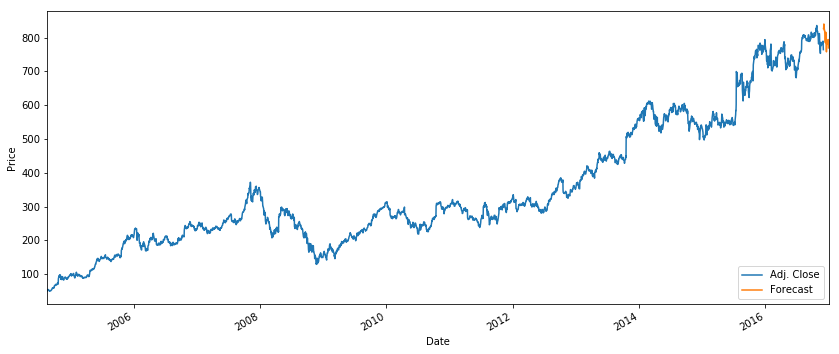

In [22]:
#Plotting!!! 
plt.figure(figsize=(14,6))
data['Adj. Close'].plot()
data['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# <font color='blue' > Challenge </font>
- Predicting house prices
- Practice feature engineering 
- Using more developed regression techniques 

- **Link for the competition:** [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials)

## <font color='blue'>References</font>
- ** Stanford University Book:** [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
- **to know more about Linear Regression: ** [Siraj](https://github.com/llSourcell/linear_regression_live)
- **Machine Learning Playlist to fill your time until we meet after the exams: **[Sentdex](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v)

# <font color='blue'> Thank you for your attention. See you after the exams. Good luck everybody! </font>